In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Hull_df = pd.read_csv('Hull15-22-final.csv')

In [3]:
Hull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     70128 non-null  object 
 1   time                     70128 non-null  object 
 2   Ozone                    70128 non-null  float64
 3   Nitric oxide             70128 non-null  float64
 4   Nitrogen dioxide         70128 non-null  float64
 5   Nitrogen oxides          70128 non-null  float64
 6   Sulphur dioxide          70128 non-null  float64
 7   PM10                     70128 non-null  float64
 8   PM2.5                    70128 non-null  float64
 9   Wind Direction           70128 non-null  float64
 10  Wind Speed               70128 non-null  float64
 11  Temperature              70128 non-null  float64
 12  Date and time            70128 non-null  object 
 13  Humidity                 70128 non-null  float64
 14  Rainfall              

In [3]:
drop_cols = ['Sulphur dioxide', 'Rainfall', 'Hourly Sunshine Amount', 'Sea Level Pressure']
Hull_df =Hull_df.drop(columns = drop_cols)

In [4]:
plot_columns = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides', 'Ozone', 'PM10','PM2.5','Temperature', 'Wind Speed', 
              'Humidity', 'Wind Direction', 'Maximum Gust Speed', 'Visibility',
               'Hourly Total Radiation','Cloud Base Height', 'Total Cloud Amount']

In [7]:
def plot_time_plots(df, plot_columns, save_path='plots/',plot_name= 'time_plots.png'):
    import os
    columns = plot_columns

    # Calculate averages for each column
    hourly_avg = df.groupby('hour')[columns].mean()
    weekday_avg = df.groupby('weekday')[columns].mean()
    monthly_avg = df.groupby('month')[columns].mean()
    seasonal_avg = df.groupby('season')[columns].mean()

    num_columns = len(columns)
    fig, axs = plt.subplots(num_columns, 4, figsize=(20, 5 * num_columns))

    for i, column in enumerate(columns):
        # Plot hourly average
        axs[i, 0].bar(hourly_avg.index, hourly_avg[column], color='skyblue')
        axs[i, 0].set_title(f'Hourly Average {column}')
        axs[i, 0].set_xlabel('Hour')
        axs[i, 0].set_ylabel(f'Average {column}')

        # Plot weekday average
        axs[i, 1].bar(weekday_avg.index, weekday_avg[column], color='lightgreen')
        axs[i, 1].set_title(f'Weekday Average {column}')
        axs[i, 1].set_xlabel('Weekday')
        axs[i, 1].set_ylabel(f'Average {column}')

        # Plot monthly average
        axs[i, 2].bar(monthly_avg.index, monthly_avg[column], color='lightcoral')
        axs[i, 2].set_title(f'Monthly Average {column}')
        axs[i, 2].set_xlabel('Month')
        axs[i, 2].set_ylabel(f'Average {column}')

        # Plot seasonal average
        axs[i, 3].bar(seasonal_avg.index, seasonal_avg[column], color='orange')
        axs[i, 3].set_title(f'Seasonal Average {column}')
        axs[i, 3].set_xlabel('Season')
        axs[i, 3].set_ylabel(f'Average {column}')

    plt.tight_layout()
    
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)
    
    # Save the figure
    plt.savefig(os.path.join(save_path, plot_name))
    plt.show()


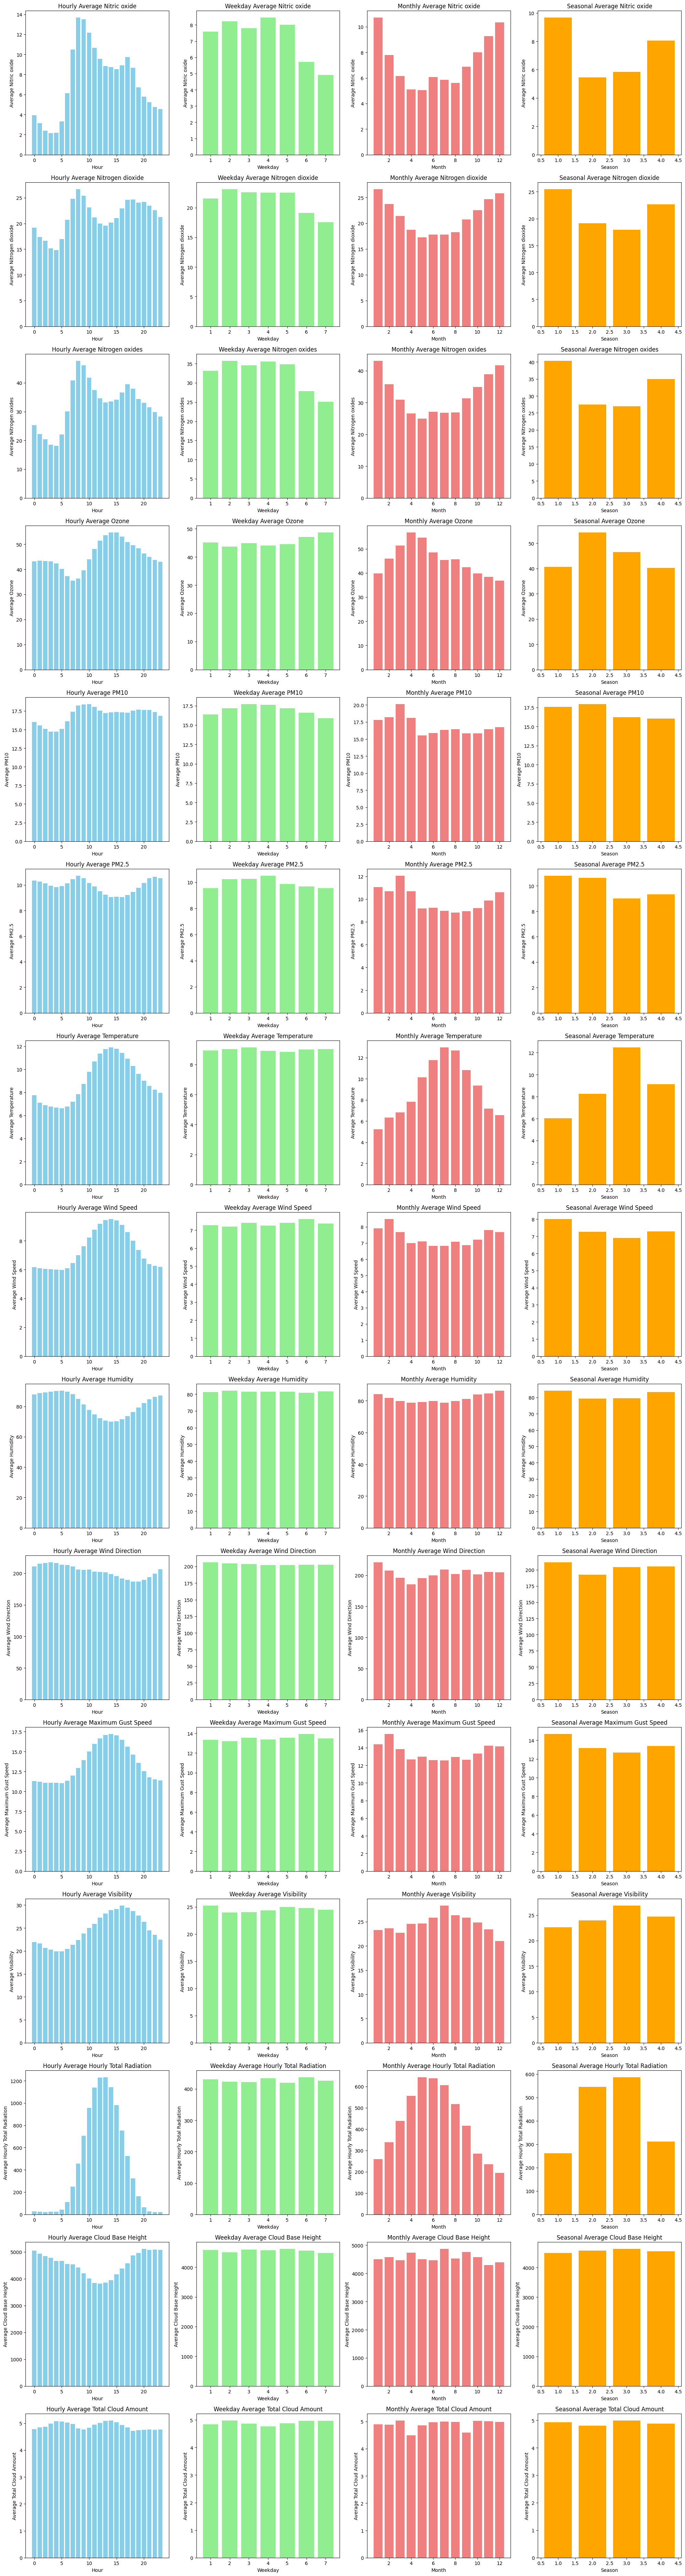

In [8]:
plot_time_plots(Hull_df, plot_columns, save_path='plots/',plot_name= 'periodic_analysis1.png')

In [9]:
def time_series_plot(df, column):
    # Example data for time series
    x = df['Date and time']  # Time intervals
    y = df[column]  # Corresponding values 

    # Set the plot size in centimeters
    plt.figure(figsize=(20, 5))

    # Create the time series plot
    plt.plot(x, y)
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Time')
    plt.ylabel(f'{column}')
    
    # Show the plot
    plt.show()


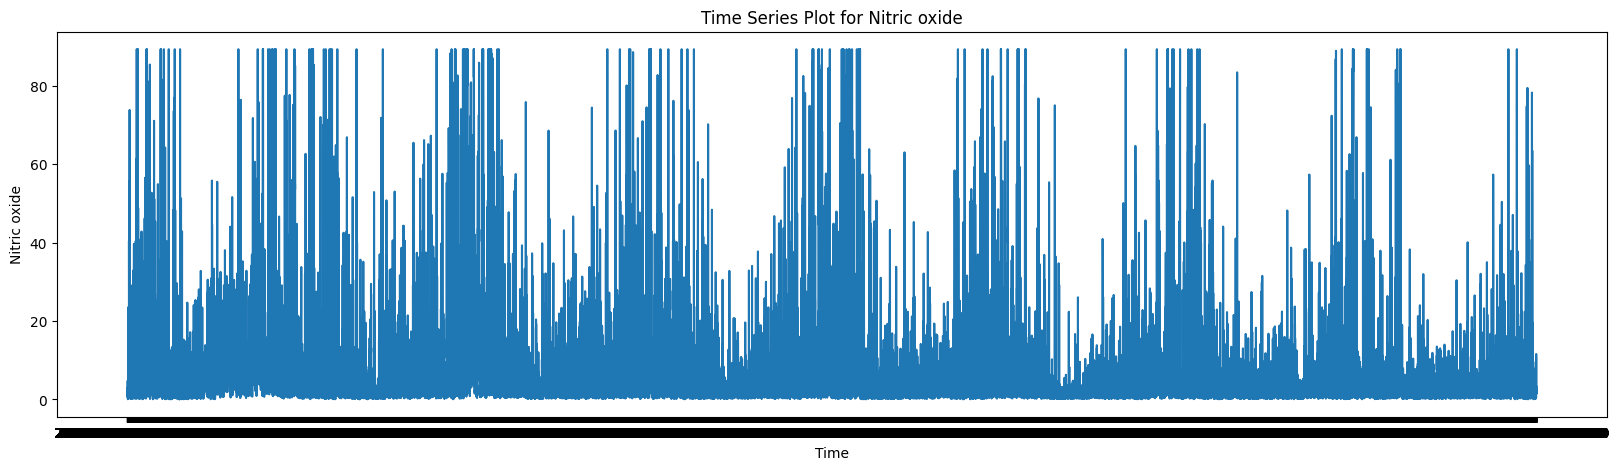

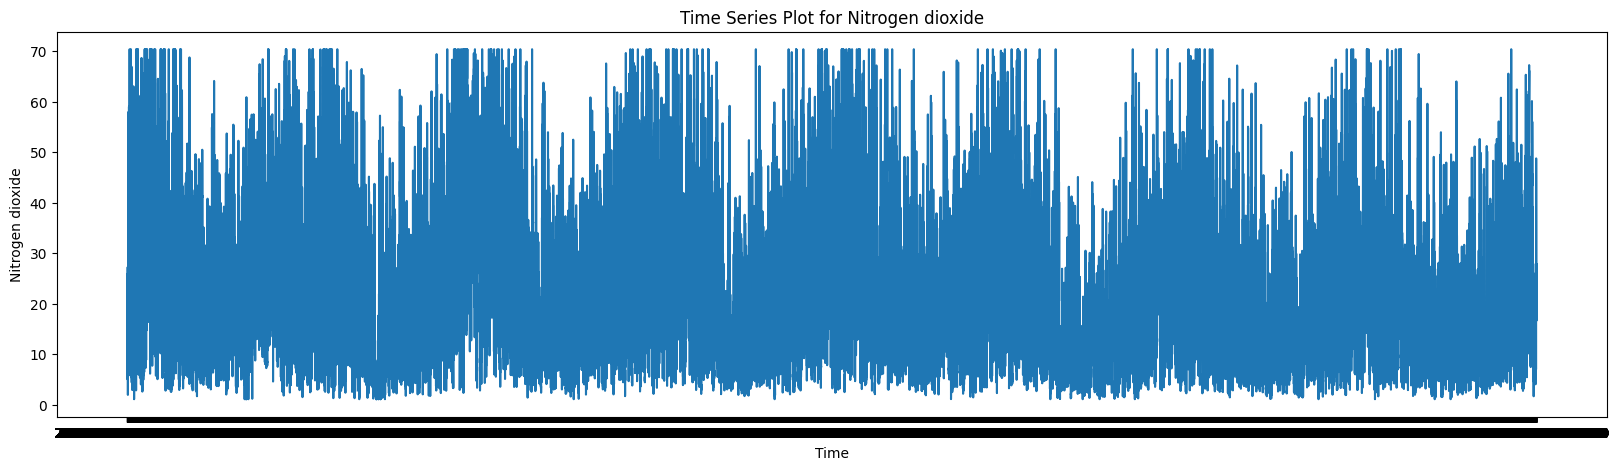

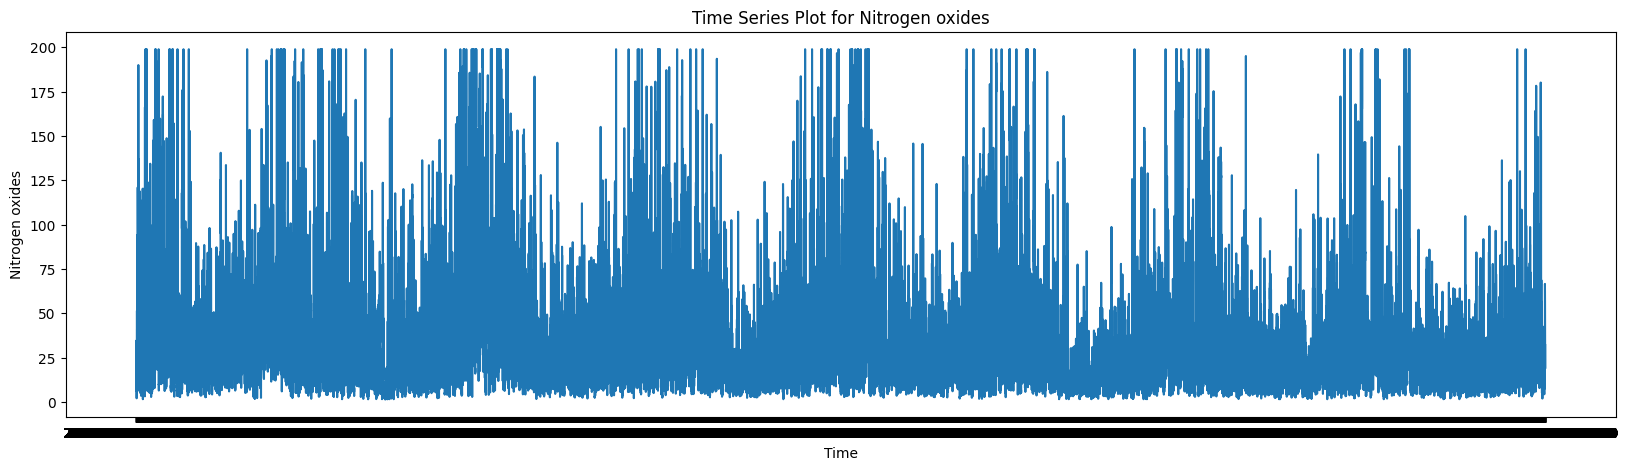

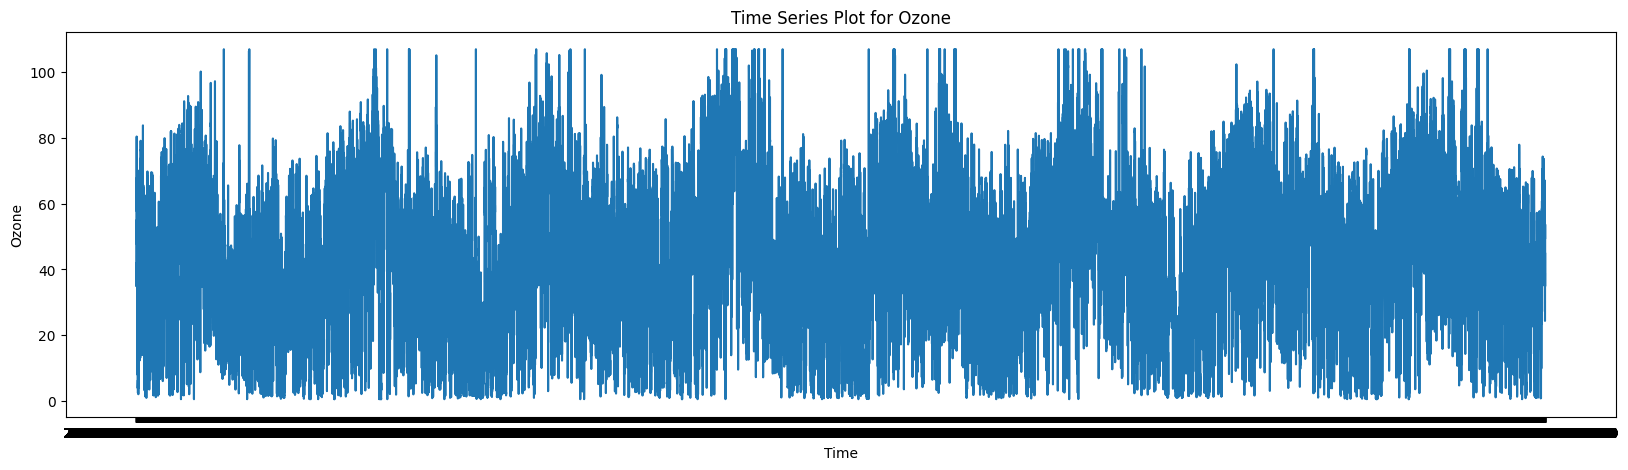

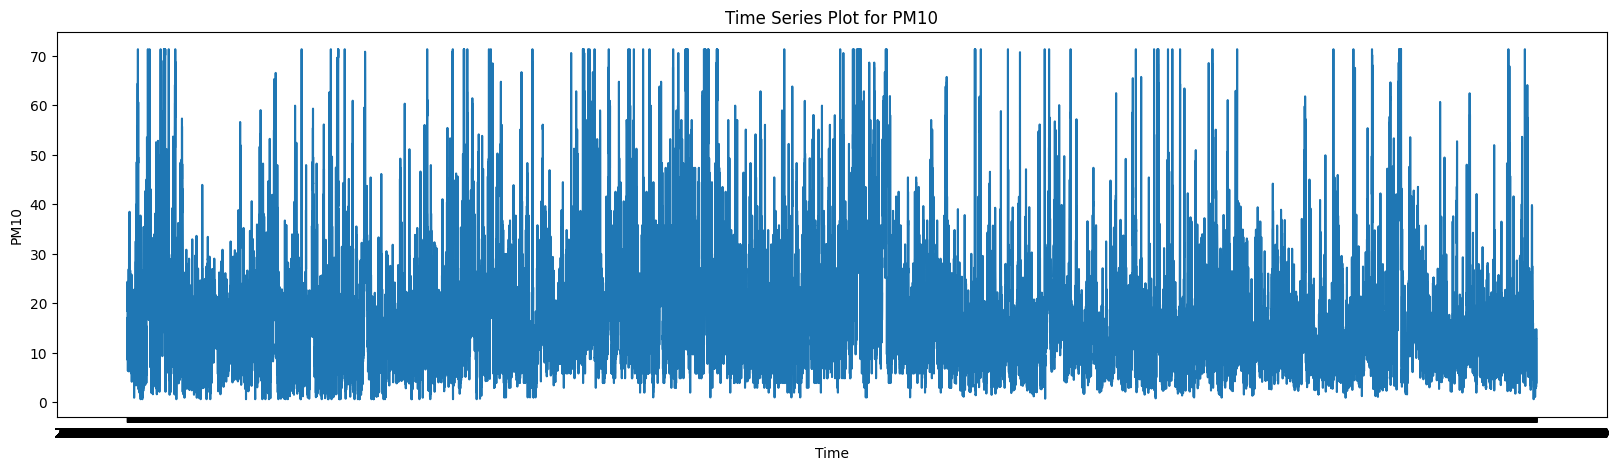

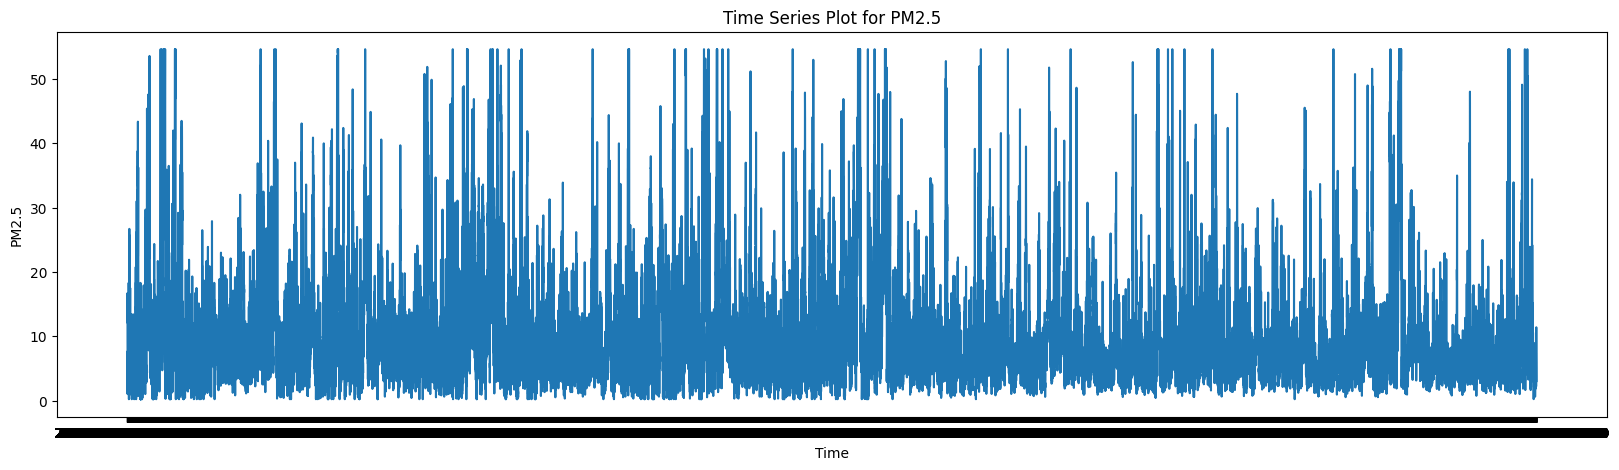

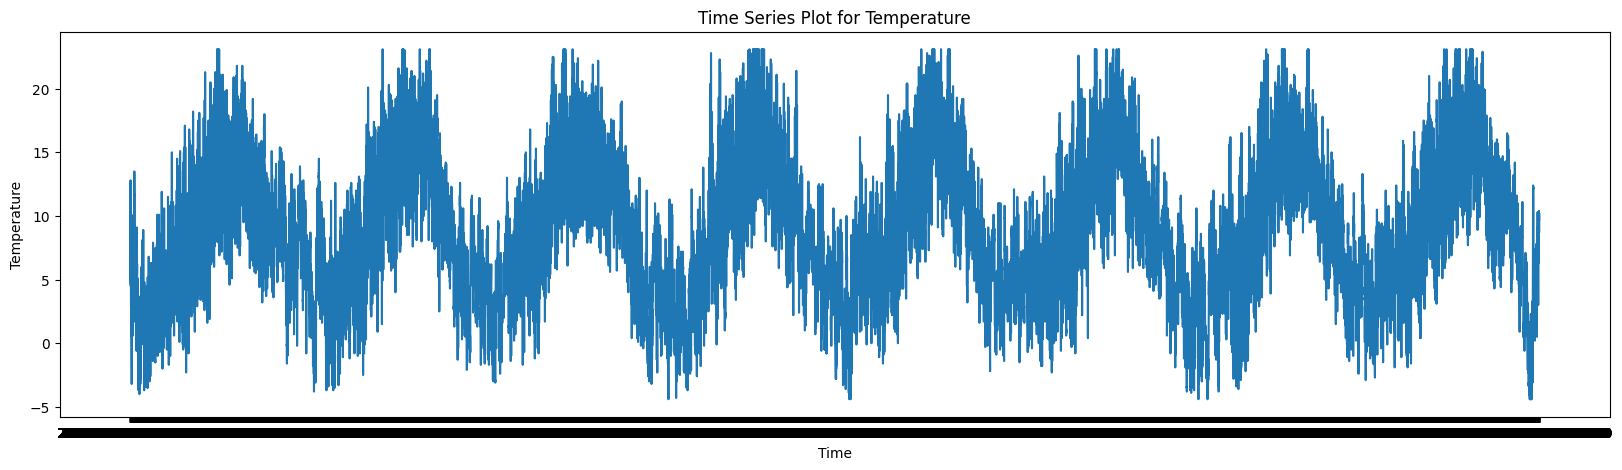

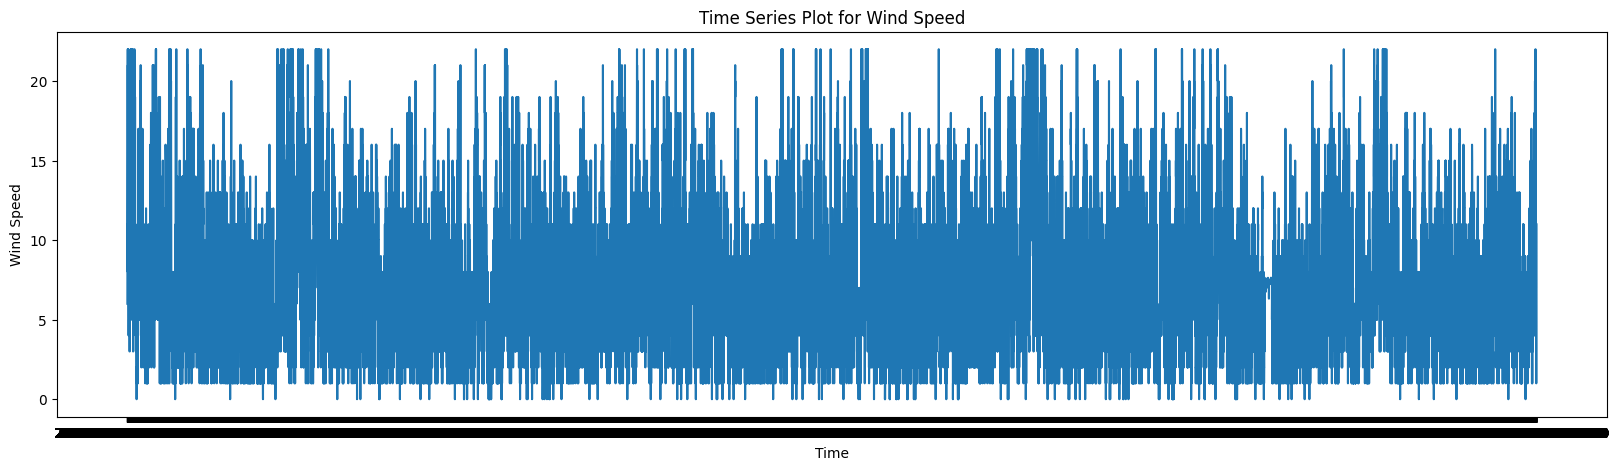

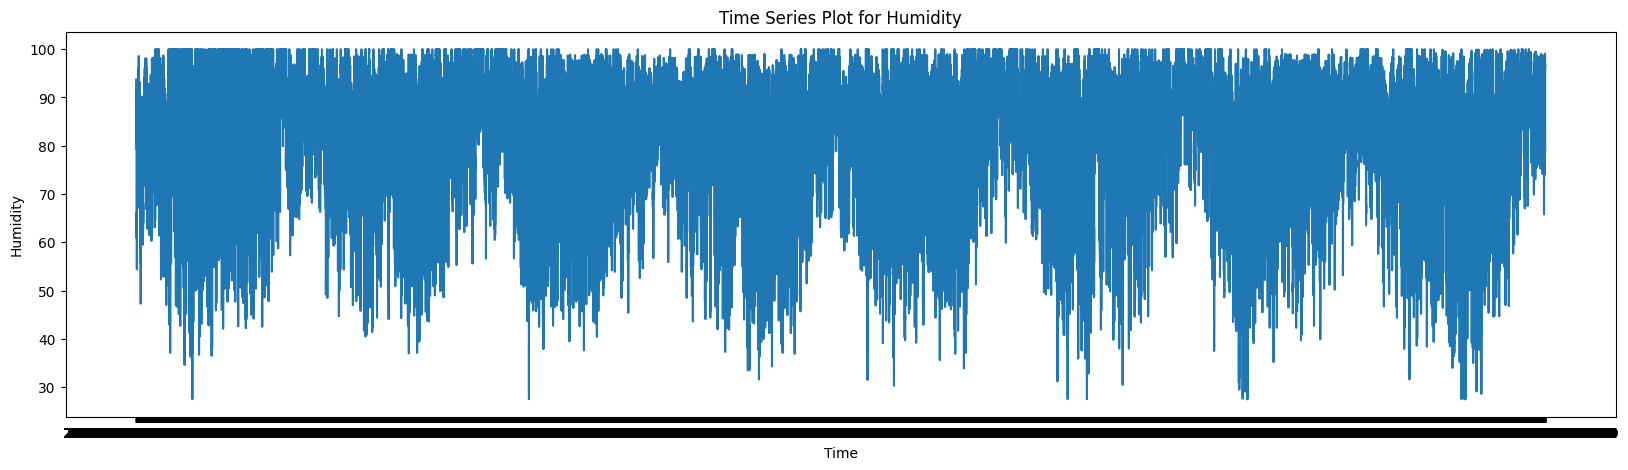

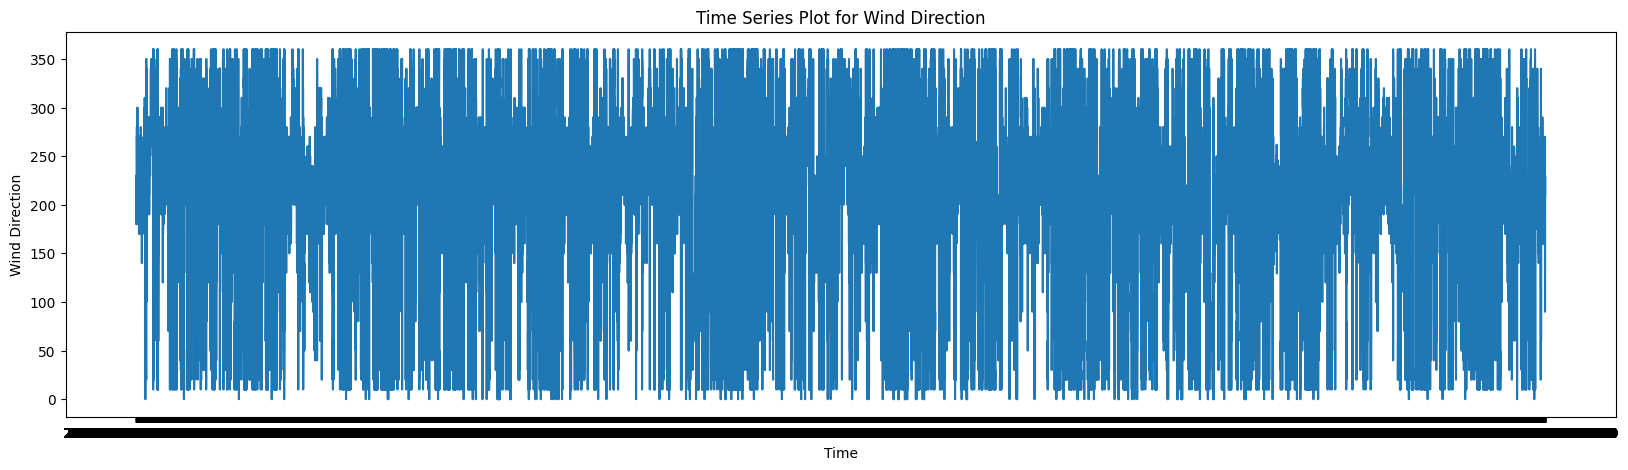

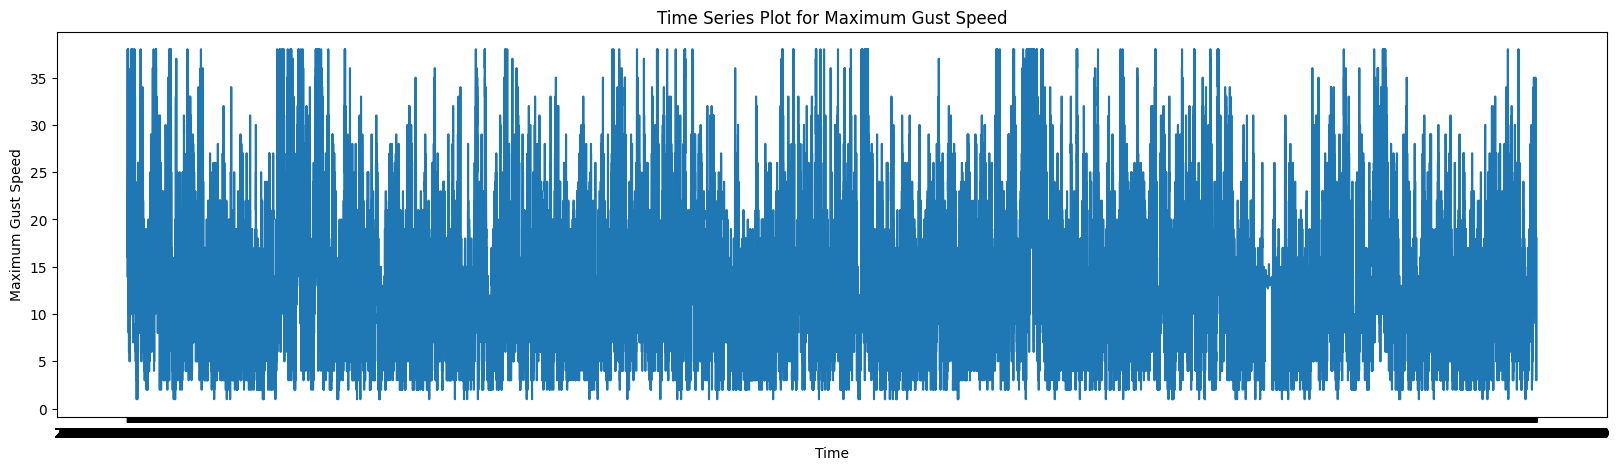

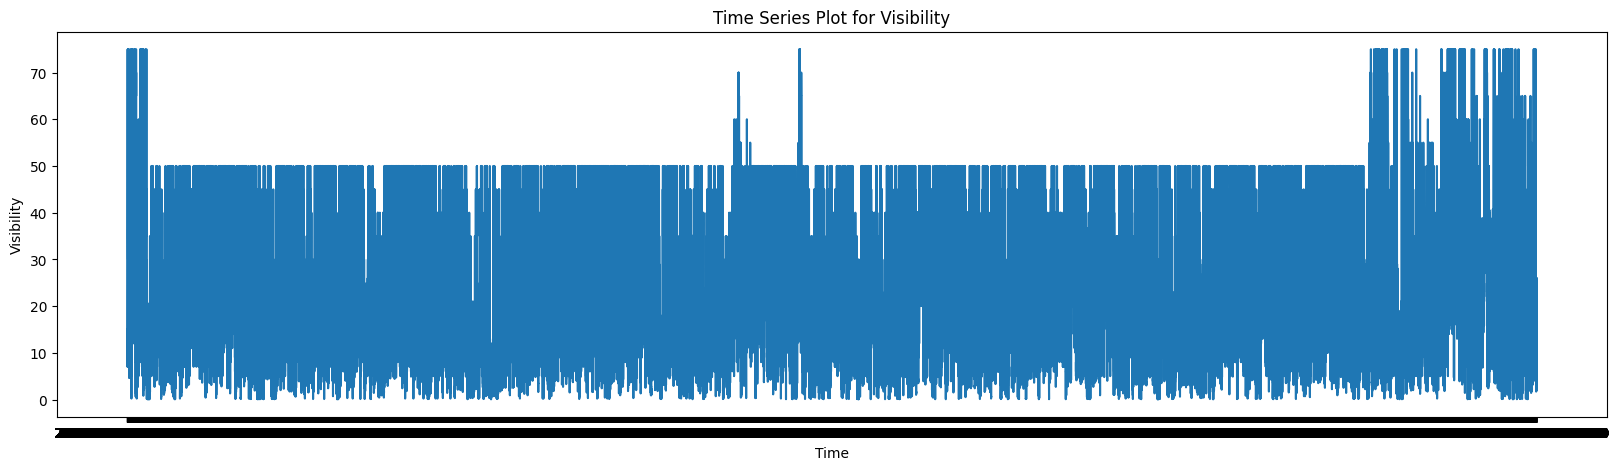

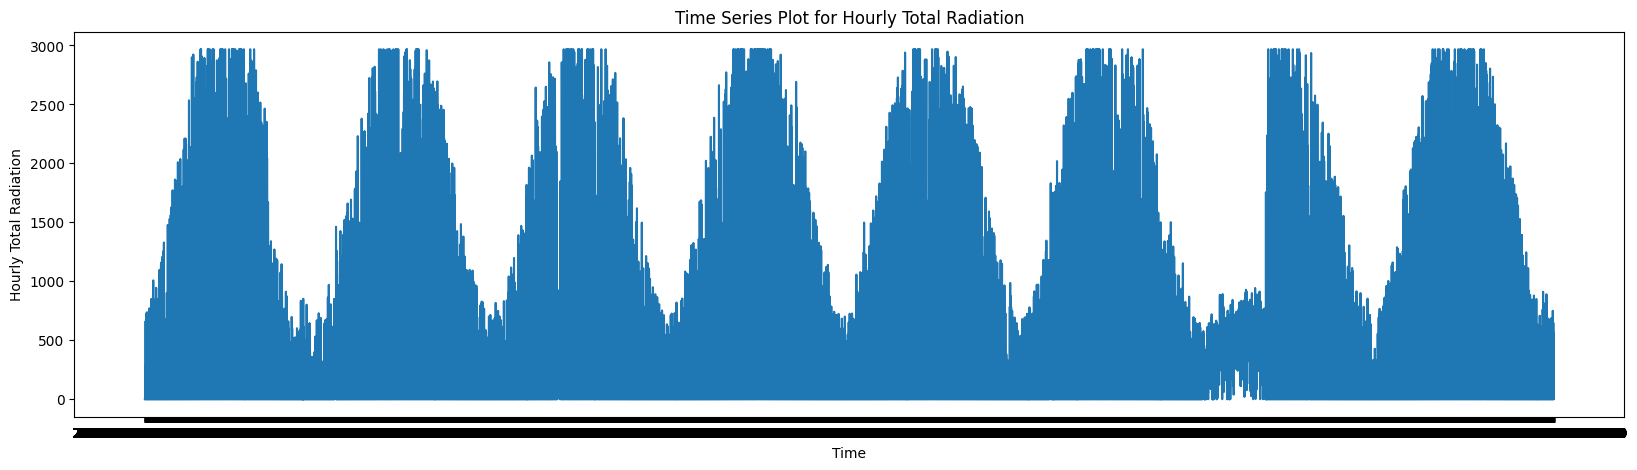

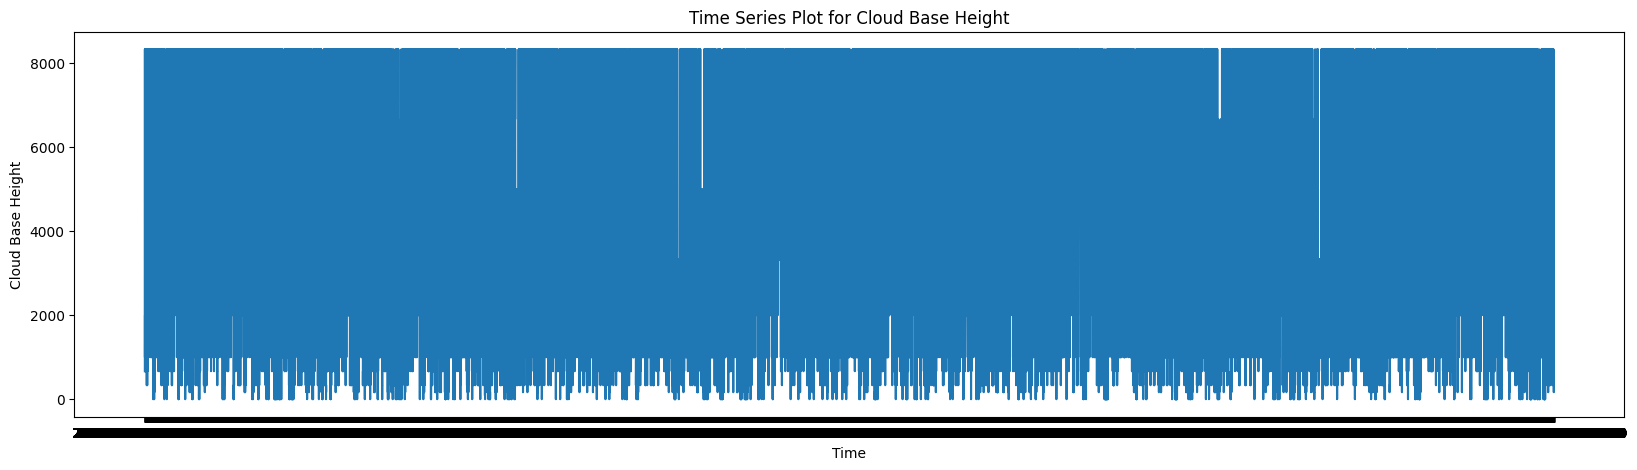

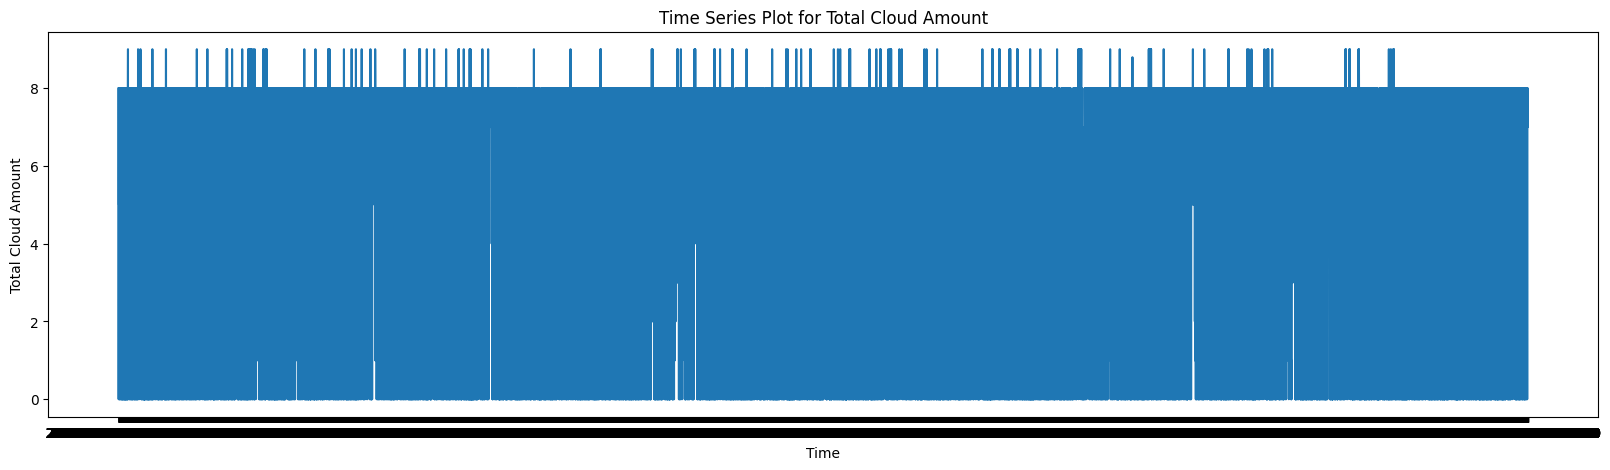

In [10]:
for column in plot_columns:
    column = column
    time_series_plot(Hull_df, column)

In [108]:
Hull = pd.read_csv('Hull15-22-final.csv')

In [109]:


num_cols= ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides', 'PM10','PM2.5','Temperature', 'Wind Speed', 'Date and time',
              'Humidity', 'Wind Cardinal Direction', 'Maximum Gust Speed', 'Visibility','Total Cloud Amount',
           'Ozone', 'Hourly Total Radiation','Cloud Base Height']
Hull['Date and time'] = pd.to_datetime(Hull['Date and time'])


In [110]:
Hull_df_num = Hull[num_cols]

In [111]:
scale_factors = {
   'Ozone':10, 'Hourly Total Radiation': 100,'Cloud Base Height':100, 'Humidity':10
}

# Apply scaling
for column, factor in scale_factors.items():
    if column in Hull_df_num.columns:
        Hull_df_num[column] = Hull_df_num[column] / factor

C:\Users\nassi\AppData\Local\Temp\ipykernel_18556\1854100765.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hull_df_num[column] = Hull_df_num[column] / factor


In [112]:
Hull_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Nitric oxide             70128 non-null  float64       
 1   Nitrogen dioxide         70128 non-null  float64       
 2   Nitrogen oxides          70128 non-null  float64       
 3   PM10                     70128 non-null  float64       
 4   PM2.5                    70128 non-null  float64       
 5   Temperature              70128 non-null  float64       
 6   Wind Speed               70128 non-null  float64       
 7   Date and time            70128 non-null  datetime64[ns]
 8   Humidity                 70128 non-null  float64       
 9   Wind Cardinal Direction  70128 non-null  int64         
 10  Maximum Gust Speed       70128 non-null  float64       
 11  Visibility               70128 non-null  float64       
 12  Total Cloud Amount       70128 n

In [113]:
# Resampling to compute averages
daily_avg = Hull_df_num.groupby(pd.Grouper(key='Date and time', freq='D')).mean()
weekly_avg = Hull_df_num.groupby(pd.Grouper(key='Date and time', freq='W')).mean()
monthly_avg = Hull_df_num.groupby(pd.Grouper(key='Date and time', freq='M')).mean()
quarterly_avg = Hull_df_num.groupby(pd.Grouper(key='Date and time', freq='Q')).mean()
yearly_avg = Hull_df_num.groupby(pd.Grouper(key='Date and time', freq='Y')).mean()


In [114]:
def plot_averages(df, features, time_intervals, plot_name):
    #Plots the averages of the specified features over different time intervals.
    
    fig, axs = plt.subplots(len(time_intervals), 1, figsize=(14, 5 * len(time_intervals)), sharex=True)
    
    # Time interval titles
    interval_titles = {
        'daily': 'Daily Average',
        'weekly': 'Weekly Average',
        'monthly': 'Monthly Average',
        'quarterly': 'Quarterly Average',
        'yearly': 'Yearly Average'
    }

    for idx, (interval, data) in enumerate(time_intervals.items()):
        for feature in features:
            if feature in data.columns:
                axs[idx].plot(data.index, data[feature], label=feature)
        axs[idx].set_title(interval_titles.get(interval, interval.capitalize()))
        axs[idx].legend()
        axs[idx].grid(True)

    plt.xlabel('Date and time')
    plt.tight_layout()
    plt.savefig(f'plots/{plot_name}')
    plt.show()


In [115]:
time_intervals = {
    'daily': daily_avg,
    'weekly': weekly_avg,
    'monthly': monthly_avg,
    'quarterly': quarterly_avg,
    'yearly': yearly_avg
}

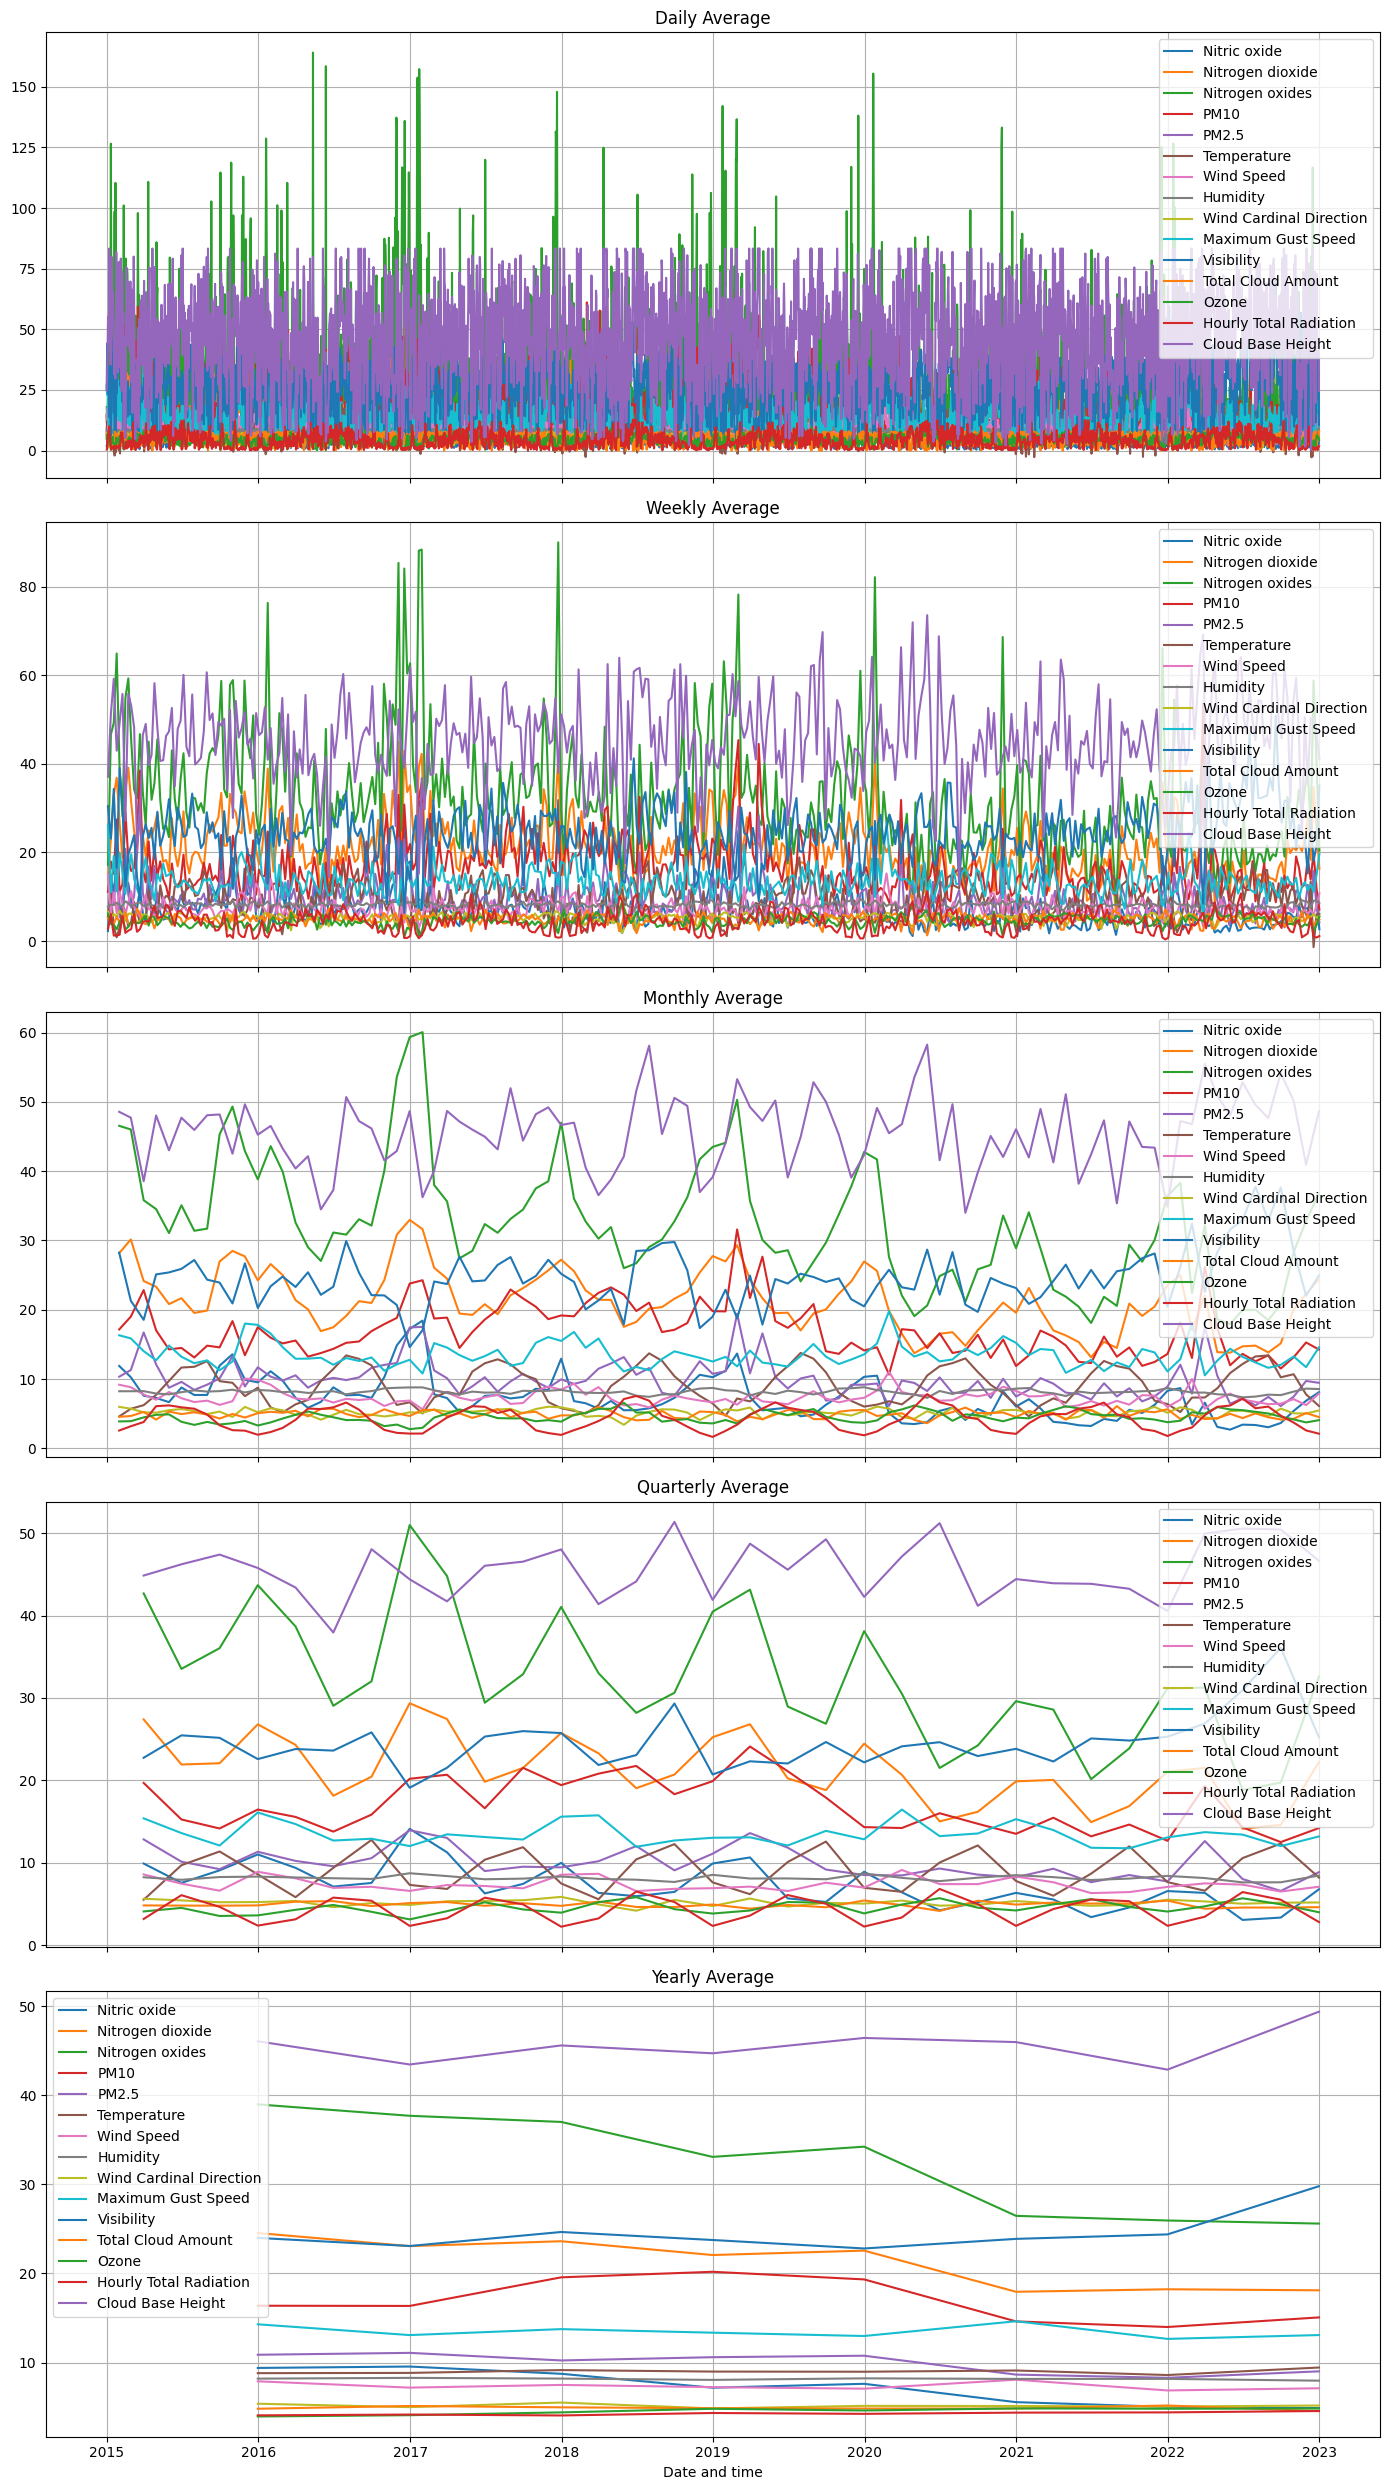

In [116]:
plot_averages(Hull_df_num, num_cols, time_intervals, 'pollutantAndWeather1')

In [5]:
df_1 = Hull_df[plot_columns]


In [7]:
def select_features_based_on_correlation(dataframe, target_variable, threshold=0.4):

    #Select features based on Pearson Correlation Coefficient with respect to a target variable.
    
    correlation_matrix = dataframe.corr()
    
    # Select features based on threshold (considering absolute values)
    selected_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > threshold].index.tolist()
    
    # Remove the target variable from the list of selected features
    if target_variable in selected_features:
        selected_features.remove(target_variable)
    
    return selected_features

In [9]:
select_features_based_on_correlation(df_1, 'PM2.5', threshold=0.4)

['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides', 'PM10', 'Visibility']

In [14]:
col_to_drop = [ 'Date', 'time', 'Date and time' ]
hull_df =Hull_df.drop(columns= col_to_drop)

In [15]:
select_features_based_on_correlation(hull_df, 'PM2.5', threshold=0.4)

['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides', 'PM10', 'Visibility']

In [1]:
from sklearn.feature_selection import mutual_info_regression

def select_features_based_on_mutual_information(dataframe, target_variable, num_features=5):

    #Select features based on Mutual Information with respect to a target variable.
    
    # Separate features and target variable
    X = dataframe.drop(columns=[target_variable])
    y = dataframe[target_variable]
    
    # Compute Mutual Information scores
    mi_scores = mutual_info_regression(X, y)
    
    # Create a DataFrame for the MI scores
    mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
    
    # Sort features by MI score in descending order
    mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)
    
    # Select the top 'num_features' features
    selected_features = mi_scores_df.head(num_features)['Feature'].tolist()
    
    return selected_features


In [18]:
selected_features = select_features_based_on_mutual_information(hull_df, 'PM2.5', num_features=6)
print("Selected features:", selected_features)

Selected features: ['PM10', 'Visibility', 'Ozone', 'Nitrogen dioxide', 'Nitrogen oxides', 'Nitric oxide']


In [6]:
import seaborn as sns

In [50]:
ridge_df = pd.read_csv("corr/predicted_pm25_ridge.csv")
elastic_df = pd.read_csv("corr/predicted_pm25_elastic_net.csv")
rf_df = pd.read_csv("corr/predicted_pm25_rf.csv")
xgb_df = pd.read_csv("corr/predicted_pm25_xgboost.csv")
bilstm_df = pd.read_csv("corr/predicted_pm25_bilstm.csv")
stm_cnn_df = pd.read_csv("corr/predicted_pm25_cnn_lstm.csv")

In [51]:
stm_cnn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70125 entries, 0 to 70124
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PM10                       70125 non-null  float64
 1   PM2.5                      70125 non-null  float64
 2   Visibility                 70125 non-null  float64
 3   Ozone                      70125 non-null  float64
 4   Nitrogen dioxide           70125 non-null  float64
 5   Nitrogen oxides            70125 non-null  float64
 6   Nitric oxide               70125 non-null  float64
 7   Date and time              70125 non-null  object 
 8   1 hour                     70125 non-null  float64
 9   2 hour                     70125 non-null  float64
 10  3 hour                     70125 non-null  float64
 11  PM2.5_pre_1 hour_cnn_lstm  70122 non-null  float64
 12  PM2.5_pre_2 hour_cnn_lstm  70122 non-null  float64
 13  PM2.5_pre_3 hour_cnn_lstm  70122 non-null  flo

In [52]:
dfs = [
    ridge_df[['PM2.5', 'PM2.5_pre_1 hour_ridge']],
    elastic_df[['PM2.5', 'PM2.5_pre_1 hour_elastic_net']],
    rf_df[['PM2.5', 'PM2.5_pre_1 hour_rf']],
    xgb_df[['PM2.5', 'PM2.5_pre 1 hour_xgboost']],
    bilstm_df[['PM2.5', 'PM2.5_pre 1 hour_bilstm']],
    stm_cnn_df[['PM2.5', 'PM2.5_pre_1 hour_cnn_lstm']]
]

In [53]:
for i in range(len(dfs)):
    # Shift the 'PM2.5' column up by one row
    dfs[i]['PM2.5'] = dfs[i]['PM2.5'].shift(-1)
    
    # Drop the last row for all columns in the DataFrame
    dfs[i] = dfs[i].iloc[:-1, :]

C:\Users\nassi\AppData\Local\Temp\ipykernel_7232\2866665664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['PM2.5'] = dfs[i]['PM2.5'].shift(-1)


In [56]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].drop(dfs[i].index[:3])

In [57]:
for df in dfs:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70121 entries, 3 to 70123
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PM2.5                   70121 non-null  float64
 1   PM2.5_pre_1 hour_ridge  70121 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70121 entries, 3 to 70123
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PM2.5                         70121 non-null  float64
 1   PM2.5_pre_1 hour_elastic_net  70121 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70121 entries, 3 to 70123
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PM2.5                70121 non-null  float6

In [27]:
names = [
    'Ridge Regression',
    'Elastic Net',
    'Random Forest',
    'XGBoost',
    'BiLSTM',
    'CNN-LSTM'
]

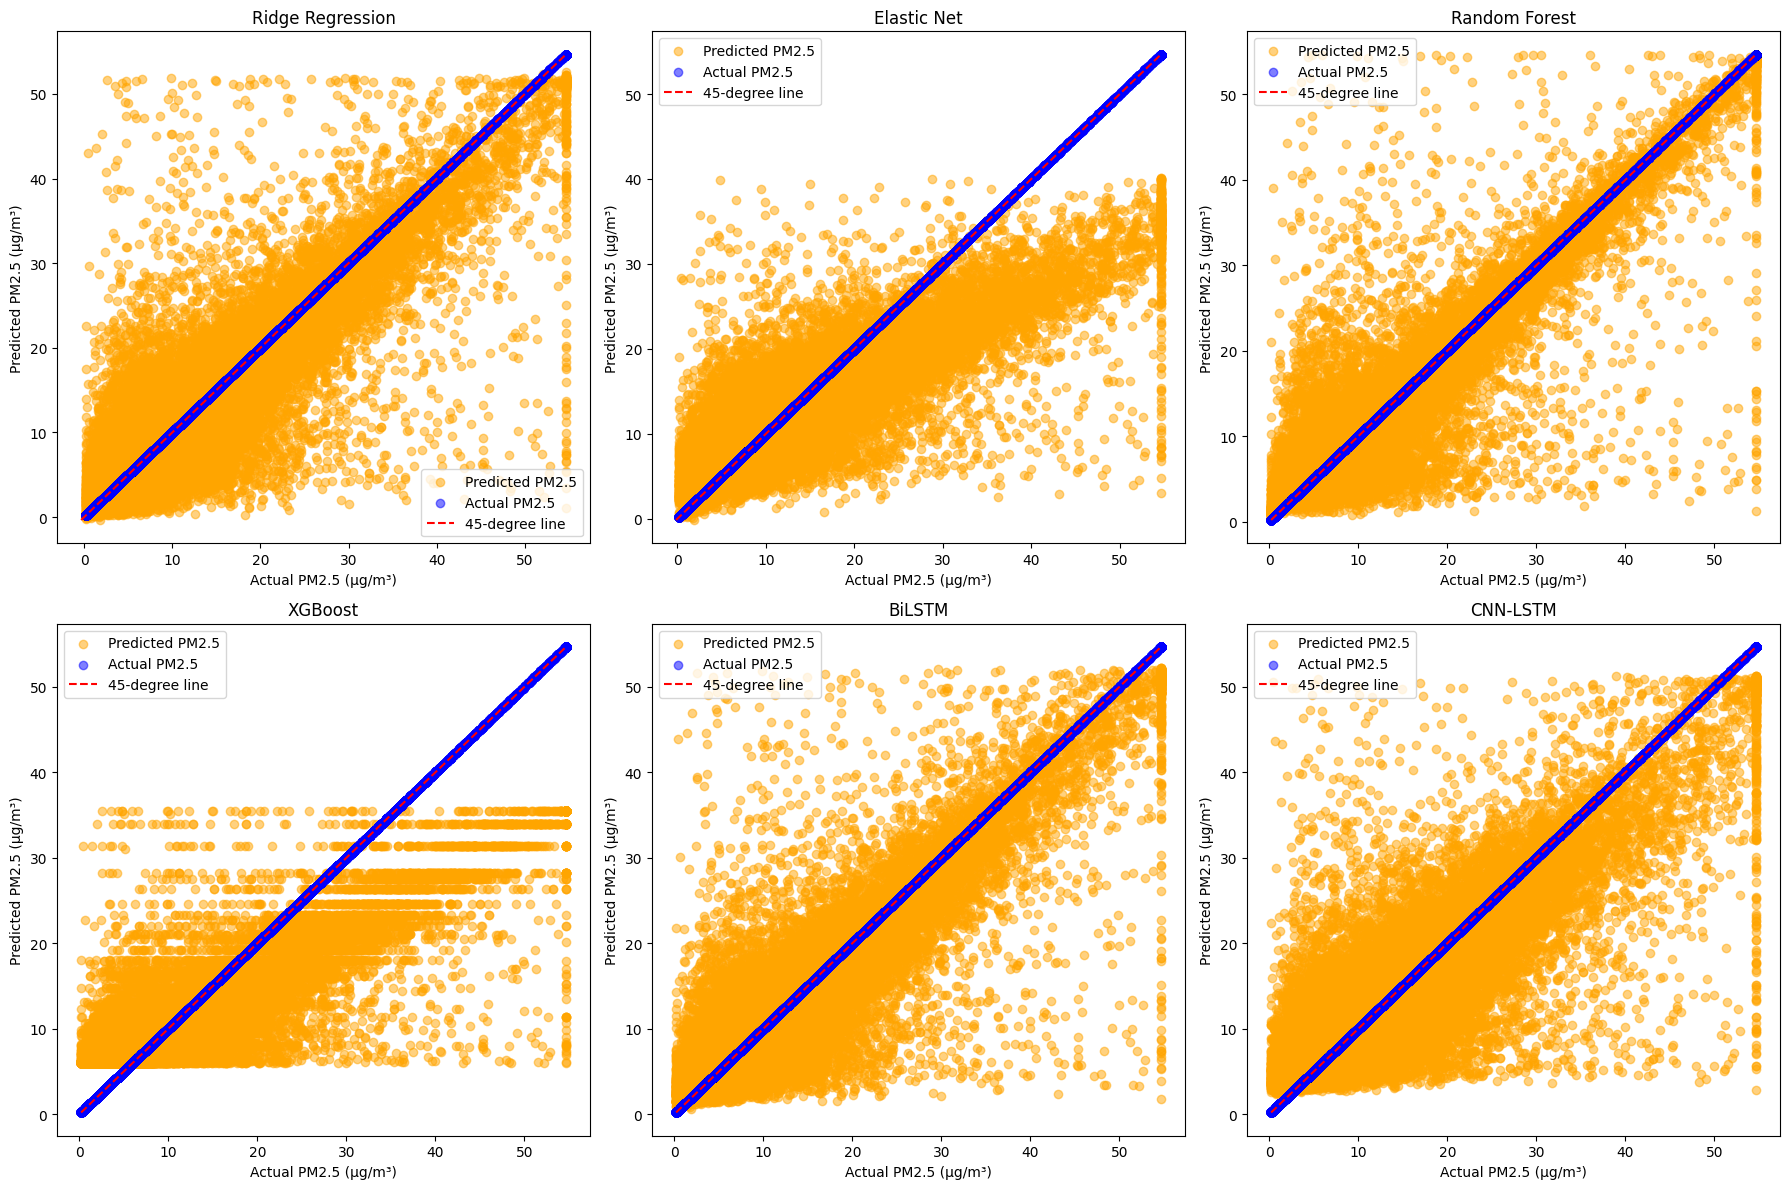

In [58]:
# 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the DataFrames and corresponding axes
for i, (df, name) in enumerate(zip(dfs, names)):
    pm2_5 = df['PM2.5']  # Actual PM2.5 concentrations
    one_hour = df.iloc[:, 1]   # Predicted PM2.5 concentrations

    # Scatter plot for predicted PM2.5 values (1 hour) in orange
    axes[i].scatter(pm2_5, one_hour, alpha=0.5, color='orange', label='Predicted PM2.5')
    # Scatter plot for actual PM2.5 values in blue
    axes[i].scatter(pm2_5, pm2_5, alpha=0.5, color='blue', label='Actual PM2.5')
    
   
    # Plot the 45-degree line (perfect match line)
    min_val = min(pm2_5.min(), one_hour.min())
    max_val = max(pm2_5.max(), one_hour.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='45-degree line')
    
    # Set labels and title
    axes[i].set_ylabel('Predicted PM2.5 (μg/m³)')
    axes[i].set_xlabel('Actual PM2.5 (μg/m³)')
    axes[i].set_title(name)
    
    # Add a legend to differentiate between the actual and predicted data points
    axes[i].legend()

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

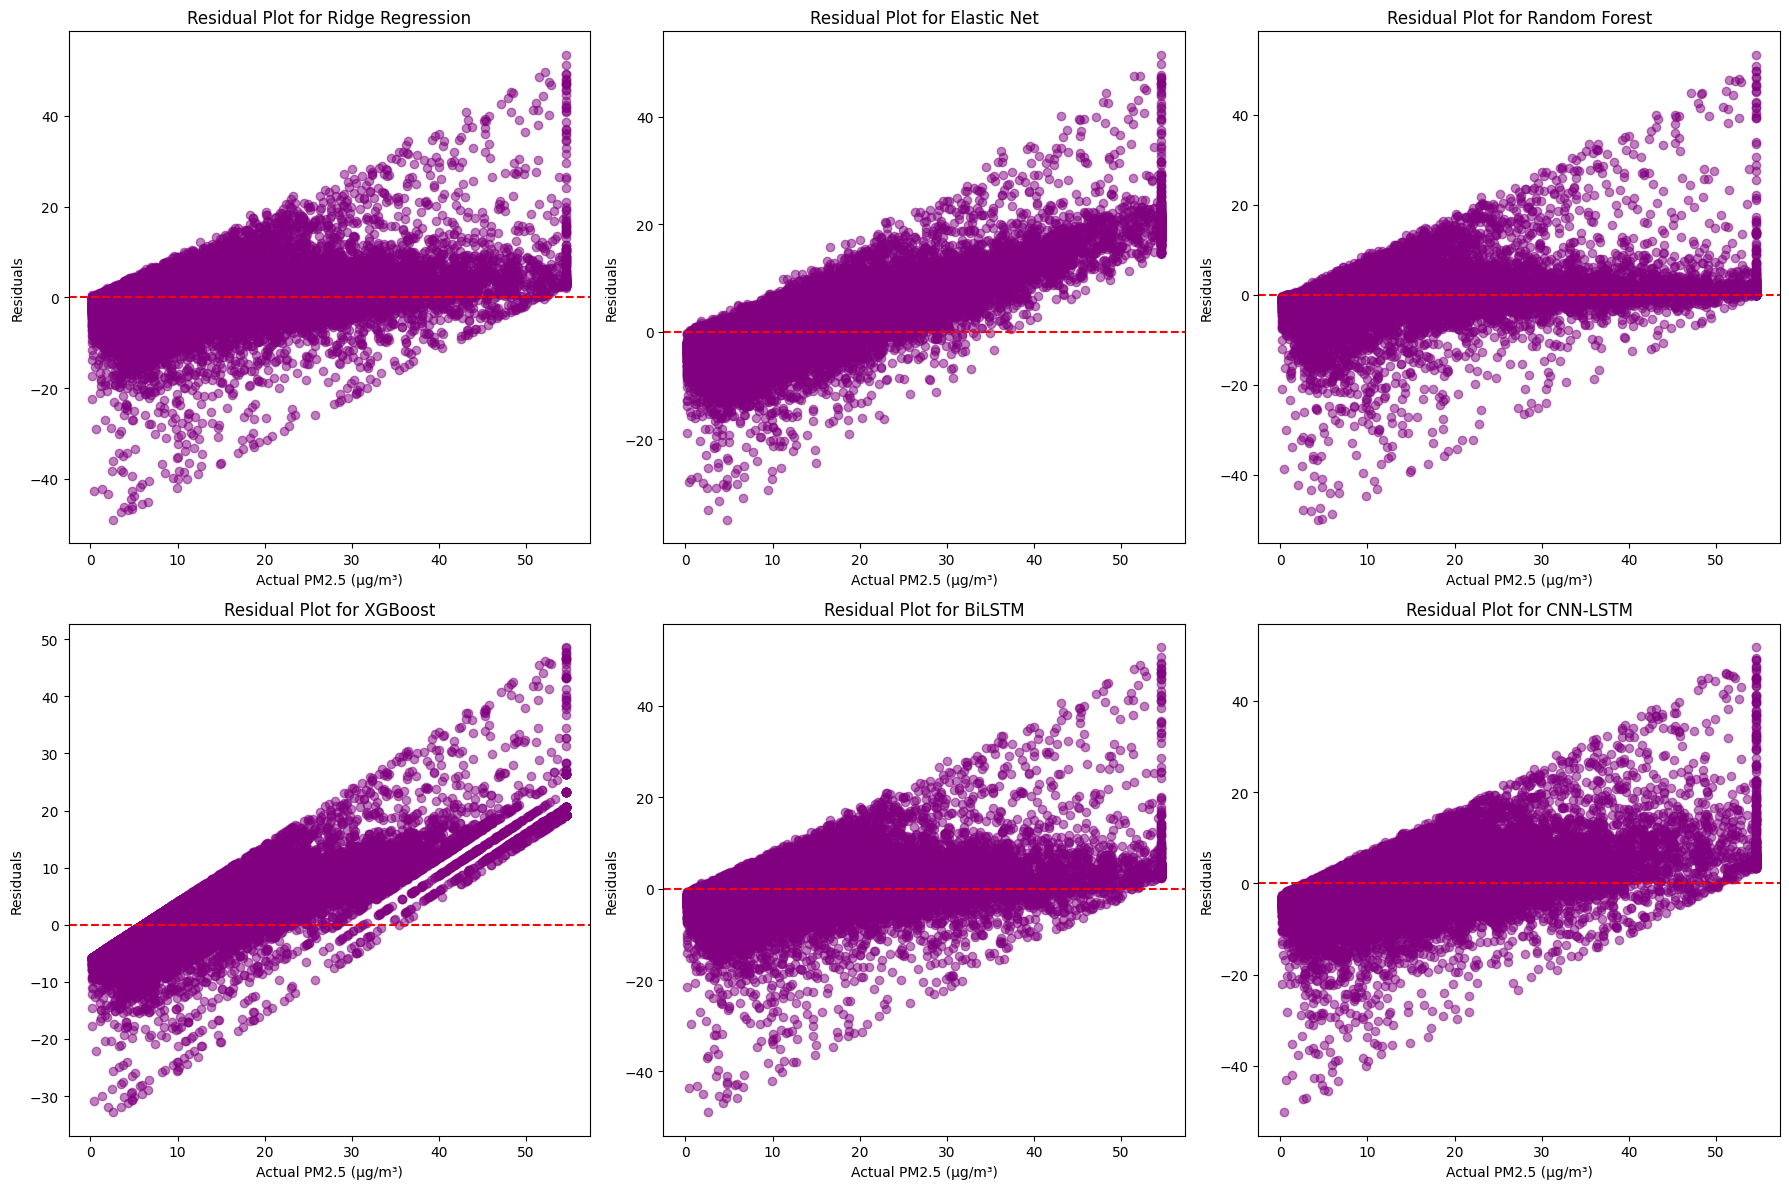

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, (df, name) in enumerate(zip(dfs, names)):
    actual = df['PM2.5']
    predicted = df.iloc[:, 1] 
    residuals = actual - predicted
    
    axes[i].scatter(actual, residuals, color='purple', alpha=0.5)
    axes[i].axhline(0, color='red', linestyle='--')  # Line at 0
    axes[i].set_xlabel('Actual PM2.5 (μg/m³)')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residual Plot for {name}')

plt.tight_layout()
plt.show()

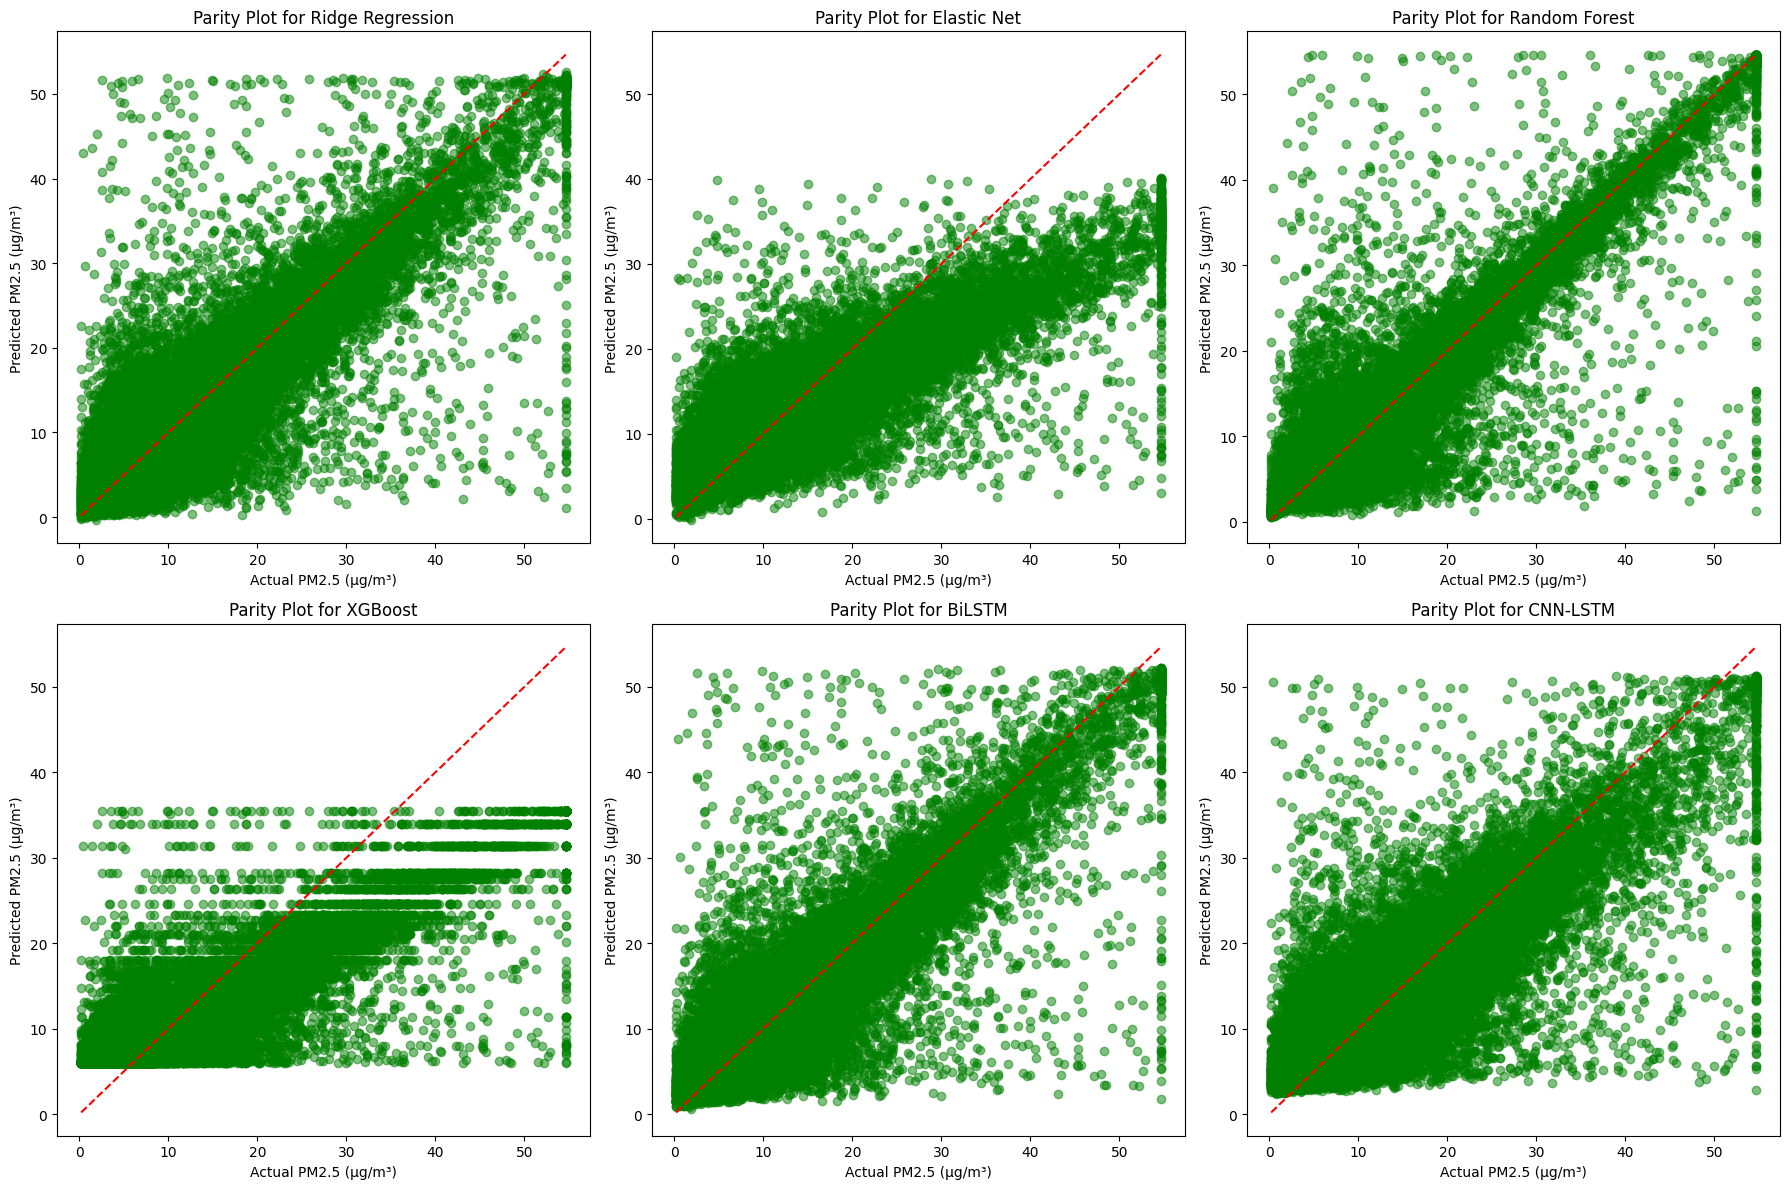

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, (df, name) in enumerate(zip(dfs, names)):
    actual = df['PM2.5']
    predicted = df.iloc[:, 1] 
    
    axes[i].scatter(actual, predicted, color='green', alpha=0.5)
    axes[i].plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red', linestyle='--')  # 1:1 line
    axes[i].set_xlabel('Actual PM2.5 (μg/m³)')
    axes[i].set_ylabel('Predicted PM2.5 (μg/m³)')
    axes[i].set_title(f'Parity Plot for {name}')

plt.tight_layout()
plt.show()

In [61]:
for i, df in enumerate(dfs):
    print(f"DataFrame {names[i]} has NaN values:\n{df.isna().sum()}")

DataFrame Ridge Regression has NaN values:
PM2.5                     0
PM2.5_pre_1 hour_ridge    0
dtype: int64
DataFrame Elastic Net has NaN values:
PM2.5                           0
PM2.5_pre_1 hour_elastic_net    0
dtype: int64
DataFrame Random Forest has NaN values:
PM2.5                  0
PM2.5_pre_1 hour_rf    0
dtype: int64
DataFrame XGBoost has NaN values:
PM2.5                       0
PM2.5_pre 1 hour_xgboost    0
dtype: int64
DataFrame BiLSTM has NaN values:
PM2.5                      0
PM2.5_pre 1 hour_bilstm    0
dtype: int64
DataFrame CNN-LSTM has NaN values:
PM2.5                        0
PM2.5_pre_1 hour_cnn_lstm    0
dtype: int64


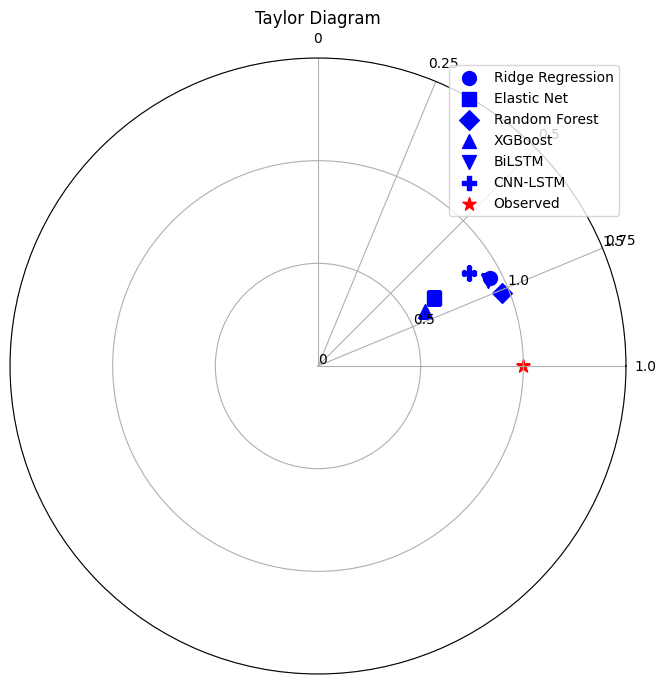

In [66]:
observed = dfs[0]['PM2.5']

# Compute the standard deviations, correlations, and RMS errors
stddevs = [np.std(df.iloc[:, 1]) for df in dfs]
correlations = [np.corrcoef(observed, df.iloc[:, 1])[0, 1] for df in dfs]
rmses = [np.sqrt(np.mean((df.iloc[:, 1] - observed) ** 2)) for df in dfs]

# Reference standard deviation (of the observed values)
ref_stddev = np.std(observed)

# Normalize standard deviations and RMSEs
normalized_stddevs = np.array(stddevs) / ref_stddev
normalized_rmses = np.array(rmses) / ref_stddev

# Define different markers for each model
markers = ['o', 's', 'D', '^', 'v', 'P']

# Create the Taylor diagram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Convert correlation to angle
angles = np.arccos(correlations)

# Plot the points with different symbols
for i, (angle, stddev) in enumerate(zip(angles, normalized_stddevs)):
    ax.scatter(angle, stddev, color='blue', marker=markers[i], s=100, label=names[i])

# Plot the reference point (perfect match)
ax.scatter(0, 1, color='red', s=100, label='Observed', marker='*')

# Configure radial (Y-axis) ticks and labels
ax.set_ylim(0, 1.5)
ax.set_yticks(np.arange(0, 1.6, 0.5))
ax.set_yticklabels(['0', '0.5', '1.0', '1.5'])

# Configure angular (X-axis) ticks and labels
ax.set_xticks(np.linspace(0, np.pi/2, 5))
ax.set_xticklabels(['1.0', '0.75', '0.5', '0.25', '0'])

# Set labels and title
plt.title('Taylor Diagram')

# Add the legend
plt.legend(loc='upper right')

# Remove text annotations (no need to annotate with model names in the plot)
# for i, name in enumerate(names):
#     ax.text(angles[i], normalized_stddevs[i], name, fontsize=10)

plt.show()
